# Introduction
Because I did some image processing project in my undergraduate, it is about the Fusion of Multi-focus Images by using some pyramid algorithms, such as Laplace pyramid. My starting idea is to do a image classification project applying the deep learning models, so I searched for the image dataset in Kaggle, and the food image dataset is more colorful and interesting. it created an application to idnetify seafood. This project is to identify what kind of food it is in a image and generate a label for it.

my github url:  https://github.com/addabbyjin/7390FoodPictureClassify

# Abstract
In this project, basic CNN model, ResNet, Random Foresty have been applied to the dataset.

#  Related research work
1. I have done the types of neural networks in the internet and what they are usually used for. 
2. As for the image classification neural models, I researched and studied some examples about it, like horse-or-donkey question, dog breed question, human face recognintion etc. 
3. To figure out what does each layer do, and what are the choices of each layer. I studied other's architecture of neural networks and run it on my notebook, applied to my dataset.
4. Applied the existing model to my dataset, and made some changes by refereing to other models.

5. Then, the CNN is the most commonly used in the image classification question. The Resnet is the first deep model used in the ImageNet and get a good accuracy. As for the Random Forest, because it has different mechanism than the CNN or other layer model, I want to use the random binary tree and choose the class of the image, the principles are interesting.


## Model explanation
### 1. CNN
Convolution Neural Network is an effective deep learning model widely used in the image recognition and classification. The CNN does best most of the time in the image classification compared to other models. So I built the CNN model first.
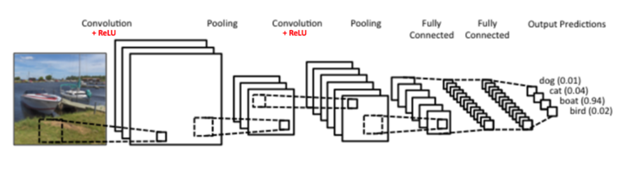


The original architecture does not have max pooling layers and the dense layer. I added one dense layer and initialized the weight matrix as zeros, and added two max pooling layers after the conv2D layers

The architecture of the model I built is below:
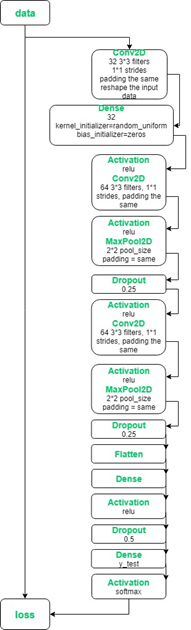

### 2. ResNet50
The ResNet50 is the pre-trained model that are built inside the Keras core. There are 50 residual layers. this picture shows 34 residual layers
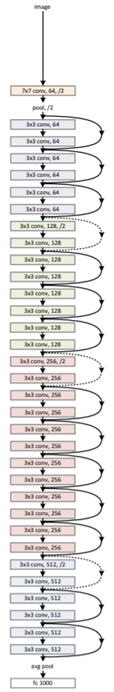

### 3. Random forest
Extract the features, predict the outcome of each randomly created decision tree, store the outcomes in each step. 
Calculate the votes for each predicted outcome.
Choose the high voted predicted outcome as the final prediction.


# Dataset
I used the HDFview software to split the dataset, and use h5py to manipulate the data, to read out label file and image file from the group in the Hierarchical Data Format.
1. HDF5Matrix is to read out one of the dataset in the H5 file
2. (1001，64，64，3）means there are 1001 images, 64*64 pixels and 3 layers(red green blue) in each image, so the images_ has 4 dimensions
3. The category_  in the test set, (100,101) means the matrix has 100 depth in the y axis, 100 records. and 101 in the x axis, 101 rows.

# Results
1. CNN 

###### without dense layer, accuracy for training is 0.8132 after 100 epochs
###### with the dense layer, accuracy for training is 0.8831 after 100 epochs

###### with the dense layer, with the droupout layer, accuracy for training is 0.8831 afte 100 epochs
###### with the dense layer, without the droupout layer, accuracy for training is 1.0000 afte 100 epochs
The droupout layer can prevent overfitting.

The predicted label is different for differnet images.
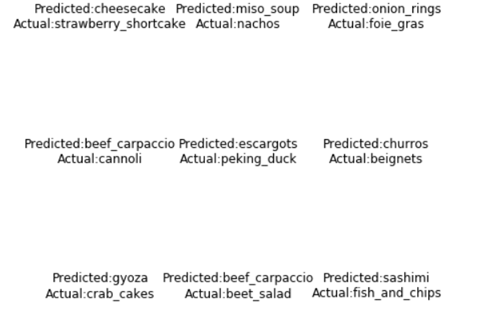

2. ResNet50
The prediction is only one class for every picture, the reason nis that choose the max value in each array
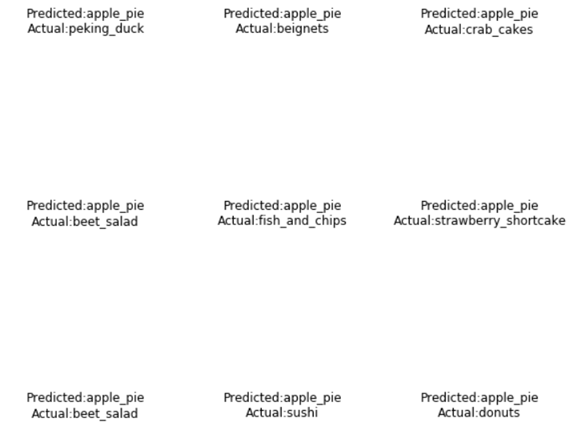

3. Random Forest
Results of rendom forest.
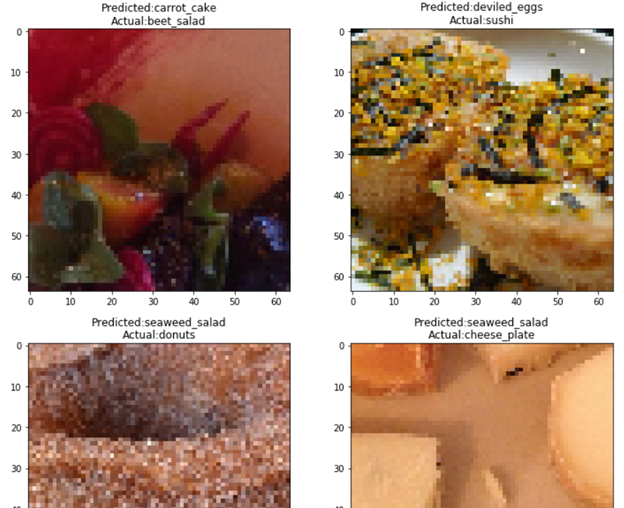

The predicted label's number is :
[ 1 21 33 21  1 15 47 36  0  1  5 70 61 23  3 72 99 96 82 44 66 65  4  8
  9 21  5  5 16  6 44  5 11 27  1  6  4 20 32  8 95 17 30  3 94 62  5  3
  2 64 85  1  2 19  8 98 22  2  3 24  5  6 42 88  4  6 12 10  2 26  9  1
 20 42  8 88  1  8 61 62 22 91 10  1 46  3 34  8 25  8 84 10 55 11  9 41
  3  9 24 29]


# Refereces
the part of the model comes from https://www.kaggle.com/kmader/food-101-overview

In [31]:
import seaborn as sns
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.utils.io_utils import HDF5Matrix
from keras.applications.imagenet_utils import preprocess_input
base_path = os.path.join('data')
train_path = os.path.join(base_path, 'food_c101_n10099_r64x64x3.h5')
test_path = os.path.join(base_path, 'food_test_c101_n1000_r64x64x3.h5')


In [32]:
# Group
X_train = HDF5Matrix(train_path, 'images_')
y_train = HDF5Matrix(train_path, 'category_copy')
test1 =HDF5Matrix(train_path,'category_names')
#test2 =HDF5Matrix(train_path,'subgroup')
print(X_train.shape)
print(X_train[0].min())
print(X_train[0].max())
print(y_train.shape)
print(test1.shape)
#print(len(test2))
print(test1[0],test1[1],test1[2])
#######################################
X_test = HDF5Matrix(test_path, 'images_')
y_test = HDF5Matrix(test_path, 'category_')
print(X_test.shape)
print(y_test.shape)
#print(len(y_test["category"]))


(1001, 64, 64, 3)
0
242
(1001, 101)
(101,)
b'apple_pie' b'baby_back_ribs' b'baklava'
(100, 64, 64, 3)
(100, 101)


In [33]:
# f1 is to read the training data file, into chunck cache
#file
import h5py
f1=h5py.File('data/food_c101_n10099_r64x64x3.h5',mode = 'r')
#  r+ grp = f.create_group("subgroup")
print(list(f1.keys()))
print(len(f1["category_copy"]))
print(len(f1["category_names"]))
print(len(f1["images_"]))
print(f1["images_"][0].shape)
print(f1["category_copy"][0].shape)
#print(f1["subgroup"][0].shape)
print(f1['category_names'][0],f1['category_names'][1],f1['category_names'][2])

['category', 'category_copy', 'category_names', 'images', 'images_', 'subgroup']
1001
101
1001
(64, 64, 3)
(101,)
b'apple_pie' b'baby_back_ribs' b'baklava'


In [5]:
# resize datasets
#dset1 = f1.create_dataset("resizable", (10,10), maxshape=(500, 20))
#read data


In [6]:
f1 = h5py.File(train_path, 'r') 
print(f1["images_"][0].shape)
print(f1['images_'].shape[0],f1['images_'].shape[1],f1['images_'].shape[2],f1['images_'].shape[3])

(64, 64, 3)
1001 64 64 3


In [7]:
print(f1["category_copy"][0].shape)
print(f1['category_copy'])

(101,)
<HDF5 dataset "category_copy": shape (1001, 101), type "|b1">


In [8]:
print(f1["category_names"][0])
print(f1['category_names'])

b'apple_pie'
<HDF5 dataset "category_names": shape (101,), type "|S40">


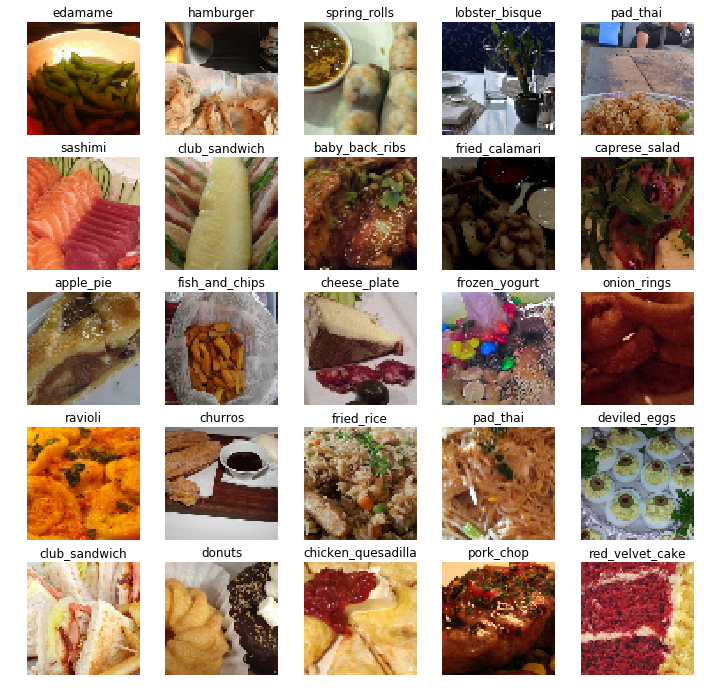

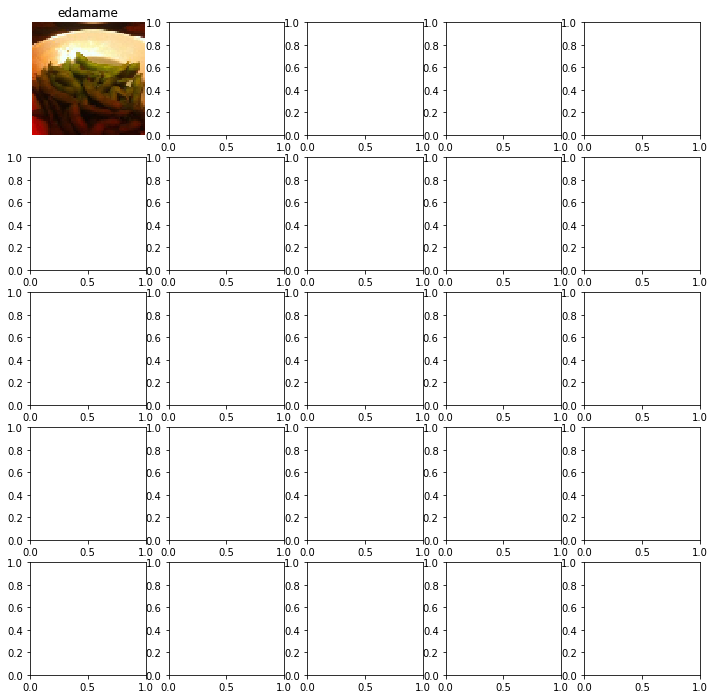

In [9]:
#show images
sample_imgs = 25
with h5py.File(train_path, 'r') as n_file:
    total_imgs = n_file['images'].shape[0]
    read_idxs = slice(0,sample_imgs)
    im_data = n_file['images'][read_idxs]
    im_label = n_file['category'].value[read_idxs]
    label_names = [x.decode() for x in n_file['category_names'].value]
fig, m_ax = plt.subplots(5, 5, figsize = (12, 12))
for c_ax, c_label, c_img in zip(m_ax.flatten(), im_label, im_data):
    c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0], cmap = 'gray')
    c_ax.axis('off')
    c_ax.set_title(label_names[np.argmax(c_label)])
    plt.show()

In [16]:
from keras.layers import Conv2D,MaxPool2D, Flatten, Dense, Dropout, Activation

In [34]:
# build a simple cnn network use keras
from keras import Sequential
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Dense(32,
             kernel_initializer='random_uniform',
             bias_initializer='zeros',
             kernel_regularizer=None,
             bias_regularizer=None,
             ))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),padding = 'same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),padding = 'same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(y_test.shape[1]))
model.add(Activation('softmax'))
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# metrics, when model is compiled, metrics function is supplied in the metrics parameter, to judge the performance of the model
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
loss_history = []
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
dense_4 (Dense)              (None, 64, 64, 32)        1056      
_________________________________________________________________
activation_7 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 32)        0         
__________

In [35]:

score = model.evaluate(X_test, 
                       y_test, 
                       #batch_size=128,
                       verbose = 1, 
                       #sample_weight = NULL,
                       steps = 3
                      )

print(score)

#If steps is set, the `batch_size` must be None.


3/3 [==============================] - 5s 2s/step
[4.613690376281738, 0.019999999552965164]



## plot out the accuracy, loss, validation accuracy

In [36]:
## from keras.callbacks import TensorBoard
from time import time

tensorboard = keras.callbacks.TensorBoard(log_dir='logs/10'.format(time()), 
                            histogram_freq=0, 
                            batch_size=32, 
                            write_graph=True, 
                            write_grads=False, 
                            write_images=True, 
                            embeddings_freq=0, 
                            embeddings_layer_names=None, 
                            embeddings_metadata=None)

In [37]:
# 2
%time
loss_history = model.fit(X_train, y_train, 
                         
                            validation_data=(X_test, y_test), 
                            epochs = 100, 
                            shuffle="batch",
                             )

Wall time: 105 µs
Train on 1001 samples, validate on 100 samples
Epoch 1/100
1001/1001 [==============================] - 42s 42ms/step - loss: 4.6328 - acc: 0.0120 - val_loss: 4.6065 - val_acc: 0.0300
Epoch 2/100
1001/1001 [==============================] - 43s 43ms/step - loss: 4.6109 - acc: 0.0140 - val_loss: 4.6103 - val_acc: 0.0000e+00
Epoch 3/100
1001/1001 [==============================] - 41s 41ms/step - loss: 4.6004 - acc: 0.0110 - val_loss: 4.6073 - val_acc: 0.0300
Epoch 4/100
1001/1001 [==============================] - 41s 41ms/step - loss: 4.5962 - acc: 0.0140 - val_loss: 4.6076 - val_acc: 0.0200
Epoch 5/100
1001/1001 [==============================] - 40s 40ms/step - loss: 4.5897 - acc: 0.0120 - val_loss: 4.6024 - val_acc: 0.0100
Epoch 6/100
1001/1001 [==============================] - 39s 39ms/step - loss: 4.5845 - acc: 0.0130 - val_loss: 4.6046 - val_acc: 0.0200
Epoch 7/100
1001/1001 [==============================] - 40s 39ms/step - loss: 4.5843 - acc: 0.0150 - val_los

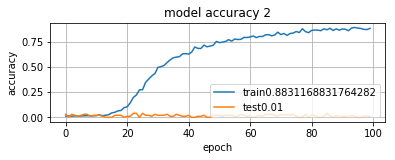

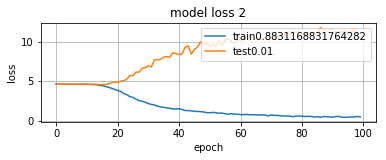

In [38]:
#2
acc=loss_history.history['acc']
val_acc=loss_history.history['val_acc']
loss=loss_history.history['loss']
val_loss=loss_history.history['val_loss']

plt.subplot(2,1,1)
plt.plot(loss_history.history['acc'])
plt.plot(loss_history.history['val_acc'])
plt.title('model accuracy 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' + str(acc[-1]),'test' + str(val_acc[-1])],loc='lower right')
plt.grid(True)
plt.show()

plt.subplot(2,1,2)
plt.plot(loss_history.history['loss'])
plt.plot(loss_history.history['val_loss'])
plt.title('model loss 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' + str(acc[-1]),'test' + str(val_acc[-1])],loc='upper right')
plt.grid(True)
plt.show()

## without droupout layer

In [21]:
# build a simple cnn network use keras
from keras import Sequential
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Dense(32,
             kernel_initializer='random_uniform',
             bias_initializer='zeros',
             kernel_regularizer=None,
             bias_regularizer=None,
             ))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),padding = 'same'))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),padding = 'same'))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(y_test.shape[1]))
model.add(Activation('softmax'))
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# metrics, when model is compiled, metrics function is supplied in the metrics parameter, to judge the performance of the model
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
loss_history = []
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
dense_4 (Dense)              (None, 64, 64, 32)        1056      
_________________________________________________________________
activation_7 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 64)        18496     
__________

In [22]:
# another way to use tensorboard
#tensorboard2 = keras.callbacks.TensorBoard(log_dir='logs/11'.format(time()))
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
tensorboard2.set_model(model)
callbacks = []
callbacks.append(tensorboard2)

# Train net:
history = model.fit(
    [X_train],
    [y_train],
    batch_size=256,
    epochs=100,
    shuffle="batch",
    verbose=1,
    callbacks=callbacks,
    validation_data=([X_test], [y_test])
).history

#TypeError: TypeError while preparing batch. If using HDF5 input data, pass shuffle="batch".


# to set the verbose =0,1,2 to say how you want to see the training process of each epochs
# verbose =1, the progress bar

Train on 1001 samples, validate on 100 samples
Epoch 1/100
1001/1001 [==============================] - 23s 23ms/step - loss: 4.6408 - acc: 0.0080 - val_loss: 4.6066 - val_acc: 0.0300
Epoch 2/100
1001/1001 [==============================] - 25s 25ms/step - loss: 4.5957 - acc: 0.0160 - val_loss: 4.5960 - val_acc: 0.0300
Epoch 3/100
1001/1001 [==============================] - 24s 24ms/step - loss: 4.5810 - acc: 0.0160 - val_loss: 4.5932 - val_acc: 0.0300
Epoch 4/100
1001/1001 [==============================] - 24s 24ms/step - loss: 4.5605 - acc: 0.0200 - val_loss: 4.6014 - val_acc: 0.0200
Epoch 5/100
1001/1001 [==============================] - 24s 24ms/step - loss: 4.5532 - acc: 0.0260 - val_loss: 4.6137 - val_acc: 0.0100
Epoch 6/100
1001/1001 [==============================] - 25s 25ms/step - loss: 4.5306 - acc: 0.0390 - val_loss: 4.5977 - val_acc: 0.0100
Epoch 7/100
1001/1001 [==============================] - 24s 24ms/step - loss: 4.4879 - acc: 0.0360 - val_loss: 4.6050 - val_acc: 0

In [43]:
# Test net:
from keras import backend as K
K.set_learning_phase(0)
score = model.evaluate([X_test], [y_test], verbose=0)
print(score)

[11.501484069824219, 0.040000000000000001]


The model.evaluate is to evaluate the model with test data and get a score of the X-test and y_test

# when epochs=500

In [15]:
#for i in range(10):
loss_history += [model.fit(X_train, y_train,
                               validation_data=(X_test, y_test), 
                               batch_size = 256,
                               epochs = 500, shuffle="batch")]

Train on 1001 samples, validate on 100 samples
Epoch 1/500
1001/1001 [==============================] - 48s 48ms/step - loss: 5.2073 - acc: 0.0090 - val_loss: 4.6063 - val_acc: 0.0000e+00
Epoch 2/500
1001/1001 [==============================] - 43s 43ms/step - loss: 4.6215 - acc: 0.0140 - val_loss: 4.6102 - val_acc: 0.0000e+00
Epoch 3/500
1001/1001 [==============================] - 36s 36ms/step - loss: 4.6056 - acc: 0.0130 - val_loss: 4.6103 - val_acc: 0.0200
Epoch 4/500
1001/1001 [==============================] - 24s 24ms/step - loss: 4.6013 - acc: 0.0180 - val_loss: 4.6107 - val_acc: 0.0000e+00
Epoch 5/500
1001/1001 [==============================] - 25s 25ms/step - loss: 4.5989 - acc: 0.0180 - val_loss: 4.6094 - val_acc: 0.0000e+00
Epoch 6/500
1001/1001 [==============================] - 25s 25ms/step - loss: 4.5967 - acc: 0.0190 - val_loss: 4.6072 - val_acc: 0.0200
Epoch 7/500
1001/1001 [==============================] - 24s 24ms/step - loss: 4.5940 - acc: 0.0160 - val_loss: 4.6

Epoch 60/500
1001/1001 [==============================] - 28s 28ms/step - loss: 1.5021 - acc: 0.5904 - val_loss: 7.2394 - val_acc: 0.0100
Epoch 61/500
1001/1001 [==============================] - 27s 27ms/step - loss: 1.5314 - acc: 0.6004 - val_loss: 7.6655 - val_acc: 0.0100
Epoch 62/500
1001/1001 [==============================] - 27s 27ms/step - loss: 1.4681 - acc: 0.6094 - val_loss: 7.7183 - val_acc: 0.0000e+00
Epoch 63/500
1001/1001 [==============================] - 28s 28ms/step - loss: 1.3241 - acc: 0.6464 - val_loss: 7.7373 - val_acc: 0.0000e+00
Epoch 64/500
1001/1001 [==============================] - 27s 27ms/step - loss: 1.3944 - acc: 0.6254 - val_loss: 7.6375 - val_acc: 0.0000e+00
Epoch 65/500
1001/1001 [==============================] - 25s 25ms/step - loss: 1.3524 - acc: 0.6364 - val_loss: 7.5324 - val_acc: 0.0000e+00
Epoch 66/500
1001/1001 [==============================] - 25s 25ms/step - loss: 1.2383 - acc: 0.6583 - val_loss: 7.7002 - val_acc: 0.0100
Epoch 67/500
1001/

1001/1001 [==============================] - 25s 25ms/step - loss: 0.4193 - acc: 0.8821 - val_loss: 9.6344 - val_acc: 0.0100
Epoch 120/500
1001/1001 [==============================] - 26s 26ms/step - loss: 0.3590 - acc: 0.8941 - val_loss: 9.8146 - val_acc: 0.0200
Epoch 121/500
1001/1001 [==============================] - 25s 25ms/step - loss: 0.3422 - acc: 0.8861 - val_loss: 9.7322 - val_acc: 0.0200
Epoch 122/500
1001/1001 [==============================] - 24s 24ms/step - loss: 0.3632 - acc: 0.8961 - val_loss: 9.9162 - val_acc: 0.0200
Epoch 123/500
1001/1001 [==============================] - 24s 24ms/step - loss: 0.3516 - acc: 0.9061 - val_loss: 9.9607 - val_acc: 0.0100
Epoch 124/500
1001/1001 [==============================] - 25s 25ms/step - loss: 0.3108 - acc: 0.9051 - val_loss: 9.9858 - val_acc: 0.0100
Epoch 125/500
1001/1001 [==============================] - 25s 25ms/step - loss: 0.3329 - acc: 0.8961 - val_loss: 10.1368 - val_acc: 0.0100
Epoch 126/500
1001/1001 [===============

1001/1001 [==============================] - 27s 27ms/step - loss: 0.1283 - acc: 0.9600 - val_loss: 11.0665 - val_acc: 0.0200
Epoch 236/500
1001/1001 [==============================] - 26s 26ms/step - loss: 0.1470 - acc: 0.9580 - val_loss: 11.0520 - val_acc: 0.0200
Epoch 237/500
1001/1001 [==============================] - 25s 25ms/step - loss: 0.0961 - acc: 0.9680 - val_loss: 11.0326 - val_acc: 0.0200
Epoch 238/500
1001/1001 [==============================] - 25s 25ms/step - loss: 0.1542 - acc: 0.9510 - val_loss: 11.0694 - val_acc: 0.0100
Epoch 239/500
1001/1001 [==============================] - 25s 25ms/step - loss: 0.1413 - acc: 0.9580 - val_loss: 11.1292 - val_acc: 0.0100
Epoch 240/500
1001/1001 [==============================] - 29s 29ms/step - loss: 0.1662 - acc: 0.9461 - val_loss: 11.2214 - val_acc: 0.0100
Epoch 241/500
1001/1001 [==============================] - 31s 31ms/step - loss: 0.1279 - acc: 0.9600 - val_loss: 11.2759 - val_acc: 0.0200
Epoch 242/500
1001/1001 [=========

1001/1001 [==============================] - 24s 24ms/step - loss: 0.1060 - acc: 0.9690 - val_loss: 11.7718 - val_acc: 0.0200
Epoch 352/500
1001/1001 [==============================] - 24s 24ms/step - loss: 0.1060 - acc: 0.9750 - val_loss: 11.7815 - val_acc: 0.0100
Epoch 353/500
1001/1001 [==============================] - 25s 25ms/step - loss: 0.0949 - acc: 0.9680 - val_loss: 11.7967 - val_acc: 0.0100
Epoch 354/500
1001/1001 [==============================] - 24s 24ms/step - loss: 0.1017 - acc: 0.9660 - val_loss: 11.7868 - val_acc: 0.0200
Epoch 355/500
1001/1001 [==============================] - 24s 24ms/step - loss: 0.1158 - acc: 0.9740 - val_loss: 11.7692 - val_acc: 0.0200
Epoch 356/500
1001/1001 [==============================] - 24s 24ms/step - loss: 0.1303 - acc: 0.9650 - val_loss: 11.6415 - val_acc: 0.0200
Epoch 357/500
1001/1001 [==============================] - 24s 24ms/step - loss: 0.0941 - acc: 0.9740 - val_loss: 11.5269 - val_acc: 0.0200
Epoch 358/500
1001/1001 [=========

KeyboardInterrupt: 

# show the prediction of food images
to see the predicted label of the food image


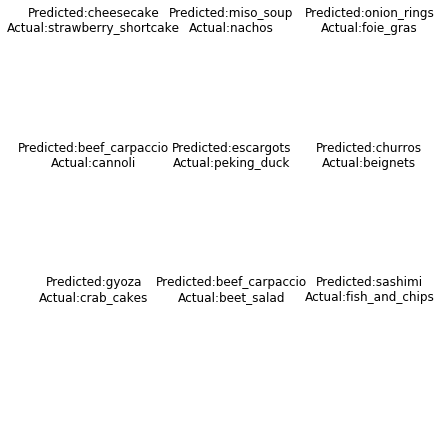

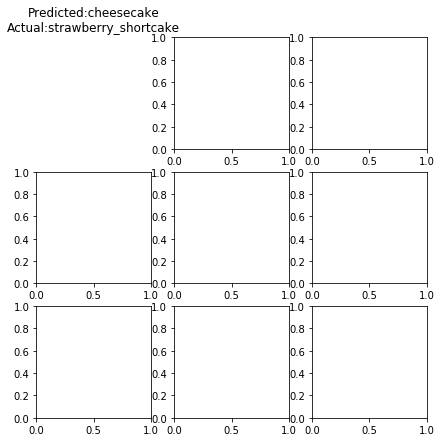

In [67]:
sample_imgs = 16
with h5py.File(test_path, 'r') as n_file:
    total_imgs = n_file['images_'].shape[0]
    read_idxs = slice(0,sample_imgs)
    im_data = n_file['images_'][read_idxs]
    im_label = n_file['category_'].value[read_idxs]
    label_names = [x.decode() for x in n_file['category_names'].value]
    
    
pred_label = model.predict(im_data)
fig, m_ax = plt.subplots(3, 3, figsize = (7, 7))

for c_ax, c_label, c_pred, c_img in zip(m_ax.flatten(), im_label, pred_label, im_data):
    #c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0], cmap = 'gray')
    c_ax.axis('off')
    c_ax.set_title('Predicted:{}\nActual:{}'.format(label_names[np.argmax(c_pred)],
                                                  label_names[np.argmax(c_label)]))
    for i in range(9):
        plt.show()